# Haggis Population Forecasting Project

## Project Overview
This notebook analyzes Haggis population data collected over a 5-year period on a specific mountain. We use both precise ground recordings and satellite remote sensing estimates to develop a model that can forecast the true population 12 months into the future.

Key components of this project include:
1. Implementing a Gaussian basis function
2. Developing ridge regression models using gradient descent
3. Exploring different cost functions (sum of squared errors vs. sum of absolute errors)
4. Combining Gaussian and sinusoidal bases to capture annual oscillations
5. Optimizing model parameters for accurate forecasting

The goal is to create a robust model that can accurately predict Haggis population trends, accounting for both long-term patterns and seasonal variations.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

The first part of this project analyzes Haggis population data on a mountain over a 5-year period.
We have two datasets:
1. Precise ground recordings (xtrue, ytrue)
2. Satellite remote sensing estimates (xdata, ydata)

The goal is to develop a model that can forecast the true population 12 months into the future using these datasets.

In [3]:
xdata = xtrain = np.array([0.18,0.24,0.54,0.72,0.78,1.08,1.14,1.56,1.80,2.28,2.52,2.64,3.42,4.26,5.23,5.29,5.53,6.19,6.37,6.85,7.03,7.15,7.21,8.41,9.07,9.55,9.85,10.03,10.09,10.39,10.57,10.87,11.11,11.41,11.53,11.59,11.71,12.13,12.67,12.73,13.33,13.45,13.51,14.95,15.20,15.80,16.10,16.40,16.46,16.58,17.06,18.44,18.80,18.86,19.52,19.88,20.60,21.20,21.32,21.74,21.86,21.92,22.28,22.58,23.00,23.60,23.72,24.38,25.05,25.23,25.59,25.65,26.85,27.03,27.21,27.69,28.11,28.95,29.07,29.31,29.61,30.21,30.27,30.57,30.63,30.81,31.05,31.77,32.25,32.37,32.43,32.85,33.15,33.69,33.81,34.29,35.14,36.28,38.50,39.16,40.18,40.54,41.20,41.50,41.68,41.92,42.34,43.00,43.18,43.48,43.66,44.08,46.07,46.73,46.97,47.99,48.29,48.95,49.37,49.49,50.15,50.33,50.45,52.07,52.13,52.73,53.51,53.93,54.41,55.14,55.26,56.76,56.94,57.24,58.02,58.26,58.38,58.50,59.64,59.70])
ydata = ytrain = np.array([1457.62,3968.47,1516.03,795.46,2352.79,1596.84,1381.90,430.62,3772.22,1452.97,1596.25,1793.11,2304.19,1009.16,1074.51,681.11,809.97,942.05,1984.75,1030.69,763.17,1884.41,3589.08,3596.94,1149.59,1345.37,1239.50,1354.94,1267.60,1431.50,284.91,1421.56,1568.11,1623.54,1591.20,1585.34,3182.33,1721.71,1602.10,3597.13,1639.07,809.11,734.26,402.23,1368.72,562.61,3986.25,1110.78,1007.08,1060.96,3085.24,2018.60,724.86,821.95,643.96,743.20,793.03,3970.70,3214.37,1155.96,1159.61,3034.74,1005.07,1076.97,1343.77,2713.52,2570.50,1615.70,1797.04,1902.72,1569.80,1518.89,1171.81,1309.40,3135.27,1183.46,967.15,1016.92,810.23,3117.81,929.69,3325.89,824.49,719.28,1666.76,804.80,1718.93,819.96,919.61,1858.23,2091.52,708.03,1263.97,1172.26,1313.50,1292.21,1648.93,2101.57,1503.69,2511.67,1327.34,1110.24,711.56,1192.01,1043.58,2837.60,724.95,3575.28,822.38,734.41,732.66,914.20,88.94,2956.52,1136.72,3096.08,1698.59,3289.12,1811.63,2018.67,1719.73,1821.07,1798.69,1338.61,1320.47,1143.24,1555.32,1812.93,766.33,1184.35,599.03,625.90,654.97,880.71,762.54,481.73,1108.31,972.81,1282.49,1252.27])
xtrue = np.array([0.00,0.06,0.12,0.18,0.24,0.30,0.36,0.42,0.48,0.54,0.60,0.66,0.72,0.78,0.84,0.90,0.96,1.02,1.08,1.14,1.20,1.26,1.32,1.38,1.44,1.50,1.56,1.62,1.68,1.74,1.80,1.86,1.92,1.98,2.04,2.10,2.16,2.22,2.28,2.34,2.40,2.46,2.52,2.58,2.64,2.70,2.76,2.82,2.88,2.94,3.00,3.06,3.12,3.18,3.24,3.30,3.36,3.42,3.48,3.54,3.60,3.66,3.72,3.78,3.84,3.90,3.96,4.02,4.08,4.14,4.20,4.26,4.32,4.38,4.44,4.50,4.56,4.62,4.68,4.74,4.80,4.86,4.92,4.98,5.05,5.11,5.17,5.23,5.29,5.35,5.41,5.47,5.53,5.59,5.65,5.71,5.77,5.83,5.89,5.95,6.01,6.07,6.13,6.19,6.25,6.31,6.37,6.43,6.49,6.55,6.61,6.67,6.73,6.79,6.85,6.91,6.97,7.03,7.09,7.15,7.21,7.27,7.33,7.39,7.45,7.51,7.57,7.63,7.69,7.75,7.81,7.87,7.93,7.99,8.05,8.11,8.17,8.23,8.29,8.35,8.41,8.47,8.53,8.59,8.65,8.71,8.77,8.83,8.89,8.95,9.01,9.07,9.13,9.19,9.25,9.31,9.37,9.43,9.49,9.55,9.61,9.67,9.73,9.79,9.85,9.91,9.97,10.03,10.09,10.15,10.21,10.27,10.33,10.39,10.45,10.51,10.57,10.63,10.69,10.75,10.81,10.87,10.93,10.99,11.05,11.11,11.17,11.23,11.29,11.35,11.41,11.47,11.53,11.59,11.65,11.71,11.77,11.83,11.89,11.95,12.01,12.07,12.13,12.19,12.25,12.31,12.37,12.43,12.49,12.55,12.61,12.67,12.73,12.79,12.85,12.91,12.97,13.03,13.09,13.15,13.21,13.27,13.33,13.39,13.45,13.51,13.57,13.63,13.69,13.75,13.81,13.87,13.93,13.99,14.05,14.11,14.17,14.23,14.29,14.35,14.41,14.47,14.53,14.59,14.65,14.71,14.77,14.83,14.89,14.95,15.02,15.08,15.14,15.20,15.26,15.32,15.38,15.44,15.50,15.56,15.62,15.68,15.74,15.80,15.86,15.92,15.98,16.04,16.10,16.16,16.22,16.28,16.34,16.40,16.46,16.52,16.58,16.64,16.70,16.76,16.82,16.88,16.94,17.00,17.06,17.12,17.18,17.24,17.30,17.36,17.42,17.48,17.54,17.60,17.66,17.72,17.78,17.84,17.90,17.96,18.02,18.08,18.14,18.20,18.26,18.32,18.38,18.44,18.50,18.56,18.62,18.68,18.74,18.80,18.86,18.92,18.98,19.04,19.10,19.16,19.22,19.28,19.34,19.40,19.46,19.52,19.58,19.64,19.70,19.76,19.82,19.88,19.94,20.00,20.06,20.12,20.18,20.24,20.30,20.36,20.42,20.48,20.54,20.60,20.66,20.72,20.78,20.84,20.90,20.96,21.02,21.08,21.14,21.20,21.26,21.32,21.38,21.44,21.50,21.56,21.62,21.68,21.74,21.80,21.86,21.92,21.98,22.04,22.10,22.16,22.22,22.28,22.34,22.40,22.46,22.52,22.58,22.64,22.70,22.76,22.82,22.88,22.94,23.00,23.06,23.12,23.18,23.24,23.30,23.36,23.42,23.48,23.54,23.60,23.66,23.72,23.78,23.84,23.90,23.96,24.02,24.08,24.14,24.20,24.26,24.32,24.38,24.44,24.50,24.56,24.62,24.68,24.74,24.80,24.86,24.92,24.98,25.05,25.11,25.17,25.23,25.29,25.35,25.41,25.47,25.53,25.59,25.65,25.71,25.77,25.83,25.89,25.95,26.01,26.07,26.13,26.19,26.25,26.31,26.37,26.43,26.49,26.55,26.61,26.67,26.73,26.79,26.85,26.91,26.97,27.03,27.09,27.15,27.21,27.27,27.33,27.39,27.45,27.51,27.57,27.63,27.69,27.75,27.81,27.87,27.93,27.99,28.05,28.11,28.17,28.23,28.29,28.35,28.41,28.47,28.53,28.59,28.65,28.71,28.77,28.83,28.89,28.95,29.01,29.07,29.13,29.19,29.25,29.31,29.37,29.43,29.49,29.55,29.61,29.67,29.73,29.79,29.85,29.91,29.97,30.03,30.09,30.15,30.21,30.27,30.33,30.39,30.45,30.51,30.57,30.63,30.69,30.75,30.81,30.87,30.93,30.99,31.05,31.11,31.17,31.23,31.29,31.35,31.41,31.47,31.53,31.59,31.65,31.71,31.77,31.83,31.89,31.95,32.01,32.07,32.13,32.19,32.25,32.31,32.37,32.43,32.49,32.55,32.61,32.67,32.73,32.79,32.85,32.91,32.97,33.03,33.09,33.15,33.21,33.27,33.33,33.39,33.45,33.51,33.57,33.63,33.69,33.75,33.81,33.87,33.93,33.99,34.05,34.11,34.17,34.23,34.29,34.35,34.41,34.47,34.53,34.59,34.65,34.71,34.77,34.83,34.89,34.95,35.02,35.08,35.14,35.20,35.26,35.32,35.38,35.44,35.50,35.56,35.62,35.68,35.74,35.80,35.86,35.92,35.98,36.04,36.10,36.16,36.22,36.28,36.34,36.40,36.46,36.52,36.58,36.64,36.70,36.76,36.82,36.88,36.94,37.00,37.06,37.12,37.18,37.24,37.30,37.36,37.42,37.48,37.54,37.60,37.66,37.72,37.78,37.84,37.90,37.96,38.02,38.08,38.14,38.20,38.26,38.32,38.38,38.44,38.50,38.56,38.62,38.68,38.74,38.80,38.86,38.92,38.98,39.04,39.10,39.16,39.22,39.28,39.34,39.40,39.46,39.52,39.58,39.64,39.70,39.76,39.82,39.88,39.94,40.00,40.06,40.12,40.18,40.24,40.30,40.36,40.42,40.48,40.54,40.60,40.66,40.72,40.78,40.84,40.90,40.96,41.02,41.08,41.14,41.20,41.26,41.32,41.38,41.44,41.50,41.56,41.62,41.68,41.74,41.80,41.86,41.92,41.98,42.04,42.10,42.16,42.22,42.28,42.34,42.40,42.46,42.52,42.58,42.64,42.70,42.76,42.82,42.88,42.94,43.00,43.06,43.12,43.18,43.24,43.30,43.36,43.42,43.48,43.54,43.60,43.66,43.72,43.78,43.84,43.90,43.96,44.02,44.08,44.14,44.20,44.26,44.32,44.38,44.44,44.50,44.56,44.62,44.68,44.74,44.80,44.86,44.92,44.98,45.05,45.11,45.17,45.23,45.29,45.35,45.41,45.47,45.53,45.59,45.65,45.71,45.77,45.83,45.89,45.95,46.01,46.07,46.13,46.19,46.25,46.31,46.37,46.43,46.49,46.55,46.61,46.67,46.73,46.79,46.85,46.91,46.97,47.03,47.09,47.15,47.21,47.27,47.33,47.39,47.45,47.51,47.57,47.63,47.69,47.75,47.81,47.87,47.93,47.99,48.05,48.11,48.17,48.23,48.29,48.35,48.41,48.47,48.53,48.59,48.65,48.71,48.77,48.83,48.89,48.95,49.01,49.07,49.13,49.19,49.25,49.31,49.37,49.43,49.49,49.55,49.61,49.67,49.73,49.79,49.85,49.91,49.97,50.03,50.09,50.15,50.21,50.27,50.33,50.39,50.45,50.51,50.57,50.63,50.69,50.75,50.81,50.87,50.93,50.99,51.05,51.11,51.17,51.23,51.29,51.35,51.41,51.47,51.53,51.59,51.65,51.71,51.77,51.83,51.89,51.95,52.01,52.07,52.13,52.19,52.25,52.31,52.37,52.43,52.49,52.55,52.61,52.67,52.73,52.79,52.85,52.91,52.97,53.03,53.09,53.15,53.21,53.27,53.33,53.39,53.45,53.51,53.57,53.63,53.69,53.75,53.81,53.87,53.93,53.99,54.05,54.11,54.17,54.23,54.29,54.35,54.41,54.47,54.53,54.59,54.65,54.71,54.77,54.83,54.89,54.95,55.02,55.08,55.14,55.20,55.26,55.32,55.38,55.44,55.50,55.56,55.62,55.68,55.74,55.80,55.86,55.92,55.98,56.04,56.10,56.16,56.22,56.28,56.34,56.40,56.46,56.52,56.58,56.64,56.70,56.76,56.82,56.88,56.94,57.00,57.06,57.12,57.18,57.24,57.30,57.36,57.42,57.48,57.54,57.60,57.66,57.72,57.78,57.84,57.90,57.96,58.02,58.08,58.14,58.20,58.26,58.32,58.38,58.44,58.50,58.56,58.62,58.68,58.74,58.80,58.86,58.92,58.98,59.04,59.10,59.16,59.22,59.28,59.34,59.40,59.46,59.52,59.58,59.64,59.70,59.76,59.82,59.88,59.94,60.00])
ytrue = np.array([1439.55,1447.74,1455.56,1463.01,1470.07,1476.75,1483.02,1488.89,1494.35,1499.39,1504.02,1508.22,1511.98,1515.32,1518.22,1520.69,1522.71,1524.29,1525.43,1526.13,1526.38,1526.20,1525.57,1524.50,1523.00,1521.06,1518.69,1515.89,1512.67,1509.03,1504.98,1500.52,1495.65,1490.39,1484.74,1478.70,1472.29,1465.52,1458.39,1450.90,1443.08,1434.93,1426.46,1417.67,1408.59,1399.22,1389.57,1379.66,1369.49,1359.08,1348.44,1337.59,1326.53,1315.28,1303.85,1292.26,1280.53,1268.65,1256.65,1244.54,1232.34,1220.06,1207.71,1195.31,1182.88,1170.42,1157.95,1145.49,1133.05,1120.65,1108.29,1096.00,1083.79,1071.67,1059.65,1047.75,1035.99,1024.37,1012.92,1001.63,990.54,979.64,968.95,958.48,948.26,938.27,928.55,919.10,909.92,901.04,892.46,884.18,876.23,868.61,861.33,854.39,847.81,841.59,835.74,830.26,825.17,820.46,816.15,812.24,808.73,805.63,802.94,800.67,798.82,797.38,796.37,795.79,795.63,795.89,796.58,797.70,799.25,801.22,803.61,806.43,809.66,813.31,817.38,821.85,826.73,832.01,837.69,843.76,850.21,857.05,864.26,871.84,879.77,888.06,896.69,905.66,914.96,924.58,934.51,944.74,955.26,966.07,977.14,988.48,1000.07,1011.90,1023.95,1036.23,1048.71,1061.38,1074.24,1087.26,1100.45,1113.78,1127.24,1140.83,1154.52,1168.31,1182.18,1196.12,1210.11,1224.15,1238.22,1252.31,1266.40,1280.48,1294.53,1308.55,1322.53,1336.44,1350.27,1364.02,1377.67,1391.20,1404.61,1417.88,1430.99,1443.95,1456.72,1469.31,1481.71,1493.88,1505.84,1517.56,1529.04,1540.27,1551.22,1561.90,1572.29,1582.39,1592.18,1601.65,1610.80,1619.61,1628.09,1636.21,1643.98,1651.37,1658.40,1665.05,1671.31,1677.18,1682.65,1687.71,1692.37,1696.62,1700.44,1703.85,1706.83,1709.38,1711.50,1713.18,1714.43,1715.24,1715.62,1715.55,1715.05,1714.10,1712.71,1710.89,1708.63,1705.93,1702.80,1699.23,1695.24,1690.82,1685.99,1680.73,1675.06,1668.98,1662.50,1655.62,1648.35,1640.69,1632.65,1624.24,1615.47,1606.34,1596.86,1587.05,1576.90,1566.43,1555.64,1544.55,1533.17,1521.51,1509.57,1497.37,1484.92,1472.23,1459.31,1446.18,1432.84,1419.31,1405.59,1391.71,1377.68,1363.50,1349.19,1334.77,1320.24,1305.62,1290.93,1276.17,1261.36,1246.52,1231.65,1216.77,1201.89,1187.03,1172.20,1157.42,1142.69,1128.03,1113.46,1098.98,1084.61,1070.37,1056.26,1042.30,1028.50,1014.87,1001.42,988.17,975.13,962.31,949.72,937.37,925.28,913.45,901.89,890.61,879.63,868.95,858.58,848.53,838.81,829.43,820.39,811.71,803.38,795.42,787.83,780.61,773.79,767.35,761.30,755.66,750.41,745.57,741.14,737.13,733.53,730.34,727.57,725.23,723.30,721.80,720.72,720.06,719.82,720.00,720.60,721.61,723.04,724.88,727.13,729.78,732.84,736.29,740.13,744.36,748.98,753.97,759.33,765.06,771.14,777.58,784.36,791.48,798.92,806.69,814.77,823.15,831.83,840.79,850.03,859.53,869.29,879.29,889.53,900.00,910.68,921.56,932.63,943.89,955.31,966.89,978.61,990.47,1002.45,1014.54,1026.73,1039.00,1051.34,1063.75,1076.20,1088.69,1101.19,1113.71,1126.23,1138.73,1151.20,1163.64,1176.02,1188.33,1200.57,1212.72,1224.77,1236.70,1248.51,1260.18,1271.70,1283.06,1294.25,1305.26,1316.07,1326.68,1337.07,1347.23,1357.16,1366.85,1376.27,1385.43,1394.32,1402.92,1411.24,1419.25,1426.95,1434.34,1441.40,1448.13,1454.52,1460.58,1466.28,1471.62,1476.60,1481.22,1485.46,1489.34,1492.83,1495.94,1498.66,1500.99,1502.94,1504.49,1505.65,1506.41,1506.77,1506.74,1506.31,1505.49,1504.27,1502.66,1500.66,1498.27,1495.49,1492.33,1488.78,1484.86,1480.57,1475.91,1470.88,1465.50,1459.77,1453.69,1447.27,1440.52,1433.44,1426.05,1418.34,1410.33,1402.03,1393.45,1384.59,1375.46,1366.08,1356.45,1346.58,1336.49,1326.18,1315.68,1304.97,1294.09,1283.04,1271.83,1260.47,1248.98,1237.37,1225.65,1213.83,1201.93,1189.96,1177.93,1165.86,1153.75,1141.63,1129.49,1117.37,1105.26,1093.19,1081.17,1069.20,1057.30,1045.49,1033.78,1022.18,1010.70,999.36,988.16,977.13,966.27,955.59,945.10,934.83,924.77,914.95,905.36,896.03,886.95,878.16,869.64,861.41,853.49,845.87,838.58,831.61,824.98,818.69,812.75,807.17,801.95,797.11,792.64,788.55,784.86,781.55,778.65,776.14,774.04,772.35,771.07,770.21,769.76,769.73,770.12,770.93,772.16,773.81,775.88,778.37,781.28,784.61,788.35,792.50,797.06,802.03,807.41,813.18,819.35,825.91,832.85,840.17,847.87,855.93,864.35,873.13,882.25,891.71,901.50,911.62,922.05,932.78,943.81,955.13,966.72,978.58,990.69,1003.05,1015.65,1028.46,1041.50,1054.73,1068.15,1081.75,1095.51,1109.43,1123.49,1137.67,1151.97,1166.38,1180.88,1195.45,1210.09,1224.77,1239.50,1254.25,1269.01,1283.78,1298.52,1313.24,1327.92,1342.54,1357.09,1371.56,1385.94,1400.21,1414.36,1428.38,1442.25,1455.96,1469.51,1482.87,1496.03,1508.99,1521.73,1534.23,1546.50,1558.51,1570.25,1581.72,1592.91,1603.79,1614.38,1624.64,1634.58,1644.18,1653.44,1662.35,1670.90,1679.08,1686.88,1694.29,1701.32,1707.95,1714.17,1719.98,1725.38,1730.36,1734.91,1739.03,1742.71,1745.96,1748.77,1751.13,1753.05,1754.51,1755.53,1756.09,1756.20,1755.86,1755.06,1753.81,1752.11,1749.95,1747.35,1744.30,1740.80,1736.86,1732.48,1727.67,1722.42,1716.75,1710.65,1704.14,1697.22,1689.89,1682.16,1674.04,1665.53,1656.64,1647.39,1637.77,1627.80,1617.49,1606.84,1595.86,1584.57,1572.97,1561.08,1548.91,1536.46,1523.75,1510.79,1497.59,1484.16,1470.52,1456.68,1442.65,1428.44,1414.07,1399.55,1384.89,1370.12,1355.23,1340.25,1325.19,1310.07,1294.89,1279.67,1264.43,1249.18,1233.94,1218.72,1203.53,1188.39,1173.32,1158.32,1143.42,1128.62,1113.95,1099.41,1085.02,1070.80,1056.75,1042.90,1029.25,1015.82,1002.63,989.68,976.98,964.56,952.43,940.59,929.06,917.84,906.96,896.43,886.24,876.42,866.98,857.92,849.25,840.99,833.13,825.70,818.70,812.13,806.01,800.34,795.13,790.37,786.09,782.28,778.95,776.11,773.75,771.88,770.50,769.62,769.24,769.35,769.97,771.08,772.70,774.81,777.43,780.54,784.15,788.25,792.84,797.92,803.48,809.52,816.04,823.02,830.47,838.37,846.73,855.52,864.75,874.41,884.49,894.98,905.87,917.15,928.81,940.84,953.23,965.97,979.05,992.45,1006.16,1020.18,1034.48,1049.05,1063.89,1078.97,1094.28,1109.82,1125.55,1141.48,1157.58,1173.84,1190.24,1206.77,1223.41,1240.15,1256.97,1273.86,1290.79,1307.75,1324.73,1341.72,1358.68,1375.61,1392.49,1409.31,1426.04,1442.68,1459.20,1475.60,1491.84,1507.93,1523.83,1539.54,1555.05,1570.33,1585.37,1600.16,1614.68,1628.91,1642.85,1656.48,1669.78,1682.75,1695.36,1707.61,1719.49,1730.98,1742.07,1752.75,1763.00,1772.83,1782.21,1791.14,1799.61,1807.62,1815.14,1822.18,1828.72,1834.76,1840.30,1845.33,1849.83,1853.81,1857.27,1860.19,1862.58,1864.43,1865.74,1866.51,1866.73,1866.41,1865.54,1864.13,1862.17,1859.67,1856.64,1853.06,1848.94,1844.30,1839.12,1833.42,1827.21,1820.48,1813.24,1805.50,1797.26,1788.55,1779.35,1769.68,1759.55,1748.97,1737.95,1726.49,1714.62,1702.33,1689.65,1676.58,1663.13,1649.33,1635.17,1620.68,1605.87,1590.75,1575.34,1559.64,1543.69,1527.48,1511.04,1494.39,1477.53,1460.48,1443.26,1425.89,1408.38,1390.75,1373.01,1355.18,1337.28,1319.33,1301.34,1283.33,1265.31,1247.30,1229.32,1211.39,1193.51,1175.72,1158.02,1140.43,1122.96,1105.64,1088.47,1071.48,1054.68,1038.08,1021.69,1005.54,989.64,973.99,958.62,943.54,928.75,914.28,900.13,886.32,872.86,859.76,847.02,834.67,822.70,811.13,799.97,789.23,778.91,769.02,759.57,750.56,742.00,733.90,726.27,719.09,712.39,706.16,700.40,695.13,690.33,686.02,682.19,678.84,675.98,673.59,671.69,670.27,669.33,668.86,668.86,669.33,670.27,671.66,673.51,675.81,678.55,681.73,685.33,689.36,693.80,698.65,703.90,709.54,715.55,721.94,728.68,735.78,743.21,750.97,759.05,767.43,776.11,785.06,794.29,803.76,813.48,823.43,833.60,843.96,854.52,865.25,876.13,887.17,898.33,909.62,921.00,932.48,944.02,955.63,967.28,978.95,990.65,1002.34,1014.01,1025.66,1037.27,1048.81,1060.28,1071.66,1082.95,1094.11,1105.15,1116.04,1126.78,1137.34,1147.73,1157.91,1167.89,1177.64,1187.16,1196.43,1205.45,1214.19,1222.66,1230.83,1238.71,1246.27,1253.50,1260.41,1266.97,1273.19])

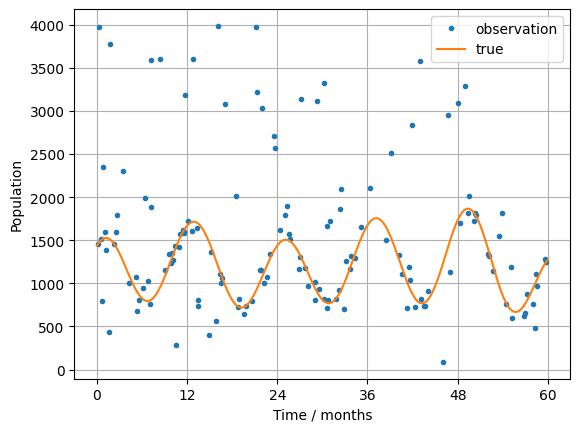

In [4]:
plt.plot(xdata,ydata,'.',label='observation')
plt.plot(xtrue,ytrue,'-',label='true')
plt.xticks(np.arange(0,61,12))
plt.xlabel('Time / months')
plt.ylabel('Population')
plt.legend()
plt.grid()

### Data Splitting Strategy

When developing the model, there is a need to consider how to split the data into training, validation, and testing sets. Let's discuss the rationale behind our chosen approach.

1. **Training Set**: We will use 70-80% of the data for training. This provides a large dataset for model training, allowing for the development of robust and accurate models.

2. **Validation Set**: We will use 10-15% of the data for validation. This set helps in tuning the model's hyperparameters and selecting the best model based on performance on unseen data.

3. **Testing Set**: We will use 10-15% of the data for testing. This final set ensures that our model's performance is evaluated on truly unseen data, providing an unbiased assessment of its generalization capabilities.

### Implementing a Gaussian Basis Function

Let's implement a Gaussian basis function for our model.


$$\exp[-\frac{(x-c)^2}{2w^2}]$$

Where:
- `c` is the center of each Gaussian basis
- `w` is a constant (hyperparameter) determining the width

We'll space the centers uniformly across the domain specified by `data_limits`. For example, if `data_limits = [-2, 4]` and `num_basis = 4`, the centers will be at -2, 0, 2, 4.

Note: We won't include a constant term for now. This should be fine if we standardize our data, as the mean will be zero.

Let's implement this new Gaussian basis function.

In [4]:
def check(checklist):
    """
    Check if the two lists are close enough.
    """
    for c in checklist:
        if np.abs(c[0]-c[1])>0.001: 
            return False
    return True

In [7]:
def check_gaussian(gaussianfn):
    """
    Check if the Gaussian basis function is working correctly.
    """
    Phi = gaussianfn(np.array([1,2,4.0,8.0]),num_basis=3,data_limits=[-2,6],width=4)
    if not check([[Phi[0,0],0.7548396],[Phi[1,1],1],[Phi[2,2],0.8824969]]):
        print("Gaussian basis invalid")
        return
    print("Success: Guassian basis function is working")


In [8]:
def gaussian(x, num_basis=4, data_limits=[-1., 1.], width = 10):
    """
    Return an N x D design matrix.
    Arguments:
     - x, input values (N dimensional vector)
     - num_basis, number of basis functions (specifies D)
     - data_limits, a list of two numbers, specifying the minimum and maximum of the data input domain.
     - width, the 'spread' of the Gaussians in the basis
    """
    centers = np.linspace(data_limits[0], data_limits[1], num_basis)
    Phi = np.zeros((x.shape[0], num_basis))
    for i in range(num_basis):
      Phi[:, i] = np.exp(-0.5 * ((x - centers[i]) / width)**2)
    return Phi

check_gaussian(gaussian)

Success: Guassian basis function is working


### Gradient Descent for Ridge Regression

Rather than compute the closed form solution, we will implement gradient descent for ridge regression (L2 regularization).

The task is towrite a function that computes the gradient of the sum squared error with respect to a parameter vector w, given L2 regularization (with regularization parameter $\lambda$).

To get us started, here is the $L2$ regularized cost function:

$$E = (y - \Phi w)^\top  (y - \Phi w) + \lambda w ^ \top w$$

Let's implement this gradient function for our ridge regression model.

In [9]:
def poly2(x):
    """
    Generate a polynomial basis function of degree 2.
    """
    return np.c_[x**0,x**1,x**2]

def check_grad_ridge(grad_ridge):
    """
    Check if the gradient function is working correctly.
    """
    w = np.array([5.0,-1,2])
    x = np.array([1,2,4.0,5.0,6.0])
    Phi = poly2(x)
    g = grad_ridge(Phi,x+1,w,1)
    t = [306., 1470., 7780.]
    if not check(list(zip(g,t))):
        print("Gradient function invalid")
        return
    print("Success: Gradient function is working")

In [10]:
def grad_ridge(Phi,y,w,lam):
    """
    Return an D dimensional vector of gradients of w, assuming we want to minimise the sum squared error
    using the design matrix in Phi; under ridge regression with regularisation parameter lambda.
    Arguments:
     - Phi, N x D design matrix
     - y, training outputs
     - w, parameters (we are finding the gradient at this value of w)
     - lam, the lambda regularisation parameter.
    """
    N, D = Phi.shape

    # Compute the gradient of the regularized cost function with respect to w
    err = Phi.dot(w) - y
    grad_L2 = 2 * Phi.T.dot(err) + 2 * lam * w

    return grad_L2

check_grad_ridge(grad_ridge)


Success: Gradient function is working


This `grad_descent` function uses gradient descent to minimise the cost function with is optimised using the gradient descent function.


In [11]:
def grad_descent(grad_fn,Phi,y,lam):
    """
    Compute optimised w.
    Parameters:
       - grad, the gradient function
       - Phi, design matrix (shape N x D)
       - y, vector of observations (length N)
       - lam, regularisation parameter, lambda.
    Returns
       - w_optimsed, a vector (length D) that minimises the ridge regression cost function
    """
    w = np.zeros(Phi.shape[1])
    for it in range(10000):
        g = grad_fn(Phi,y,w,lam)
        w-=0.0001*g
    return w

### Evaluating Our Model's Performance

Let's assess how our model is performing so far. We'll use the following approach:

1. Standardize the training data labels.
2. Use our implemented methods to make predictions for all the `true` data.
3. Hold out the last 12 months of data to evaluate the model's forecasting ability.
4. Use fixed values for hyperparameters instead of validation for this initial assessment.

This evaluation will give us a preliminary idea of how well our model is capturing the underlying patterns in the data and its potential for forecasting future populations.

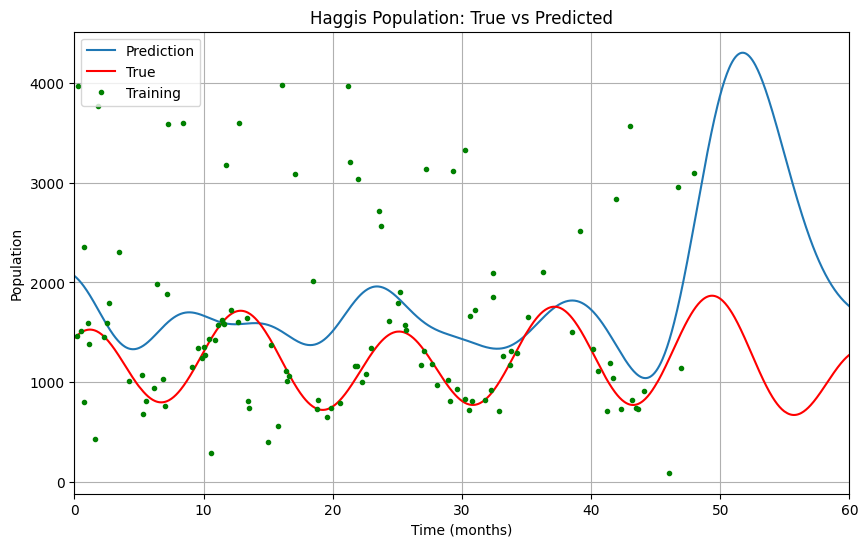

In [20]:
# Prepare the data
xtrain = xdata[xdata < 48]
ytrain = ydata[xdata < 48]
xval = xtrue[xtrue >= 48]
yval = ytrue[xtrue >= 48]

# Standardize the training data
data_mean = np.mean(ytrain)
data_std = np.std(ytrain)
ytrain_standardized = (ytrain - data_mean) / data_std

# Apply our Gaussian basis function and gradient descent
Phi = gaussian(xtrain, num_basis=120, data_limits=[0, 60], width=3)
w = grad_descent(grad_ridge, Phi, ytrain_standardized, lam=0.01)

# Generate predictions
truePhi = gaussian(xtrue, num_basis=120, data_limits=[0, 60], width=3)
predictions = (truePhi @ w) * data_std + data_mean

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(xtrue, predictions, label='Prediction')
plt.plot(xtrue, ytrue, '-r', label='True')
plt.plot(xtrain, ytrain, '.g', label='Training')
plt.legend()
plt.xlim([0, 60])
plt.xlabel('Time (months)')
plt.ylabel('Population')
plt.title('Haggis Population: True vs Predicted')
plt.grid(True)
plt.show()

There is a significant need to remove outliers from the dataset and to use a better basis function as evident from the plot.


### Implementing Sum of Absolute Errors with L2 Regularization

To potentially improve our model's performance, especially in the presence of outliers, we'll now implement a cost function using the sum of absolute errors instead of the sum squared error. We'll also maintain our L2 regularization term. Our new cost function is:

$$E = \sum_{i=1}^N{ \Big| [\Phi]_{i} w - y_i \Big|} + \lambda w^\top w$$

Our next task is to implement a function that computes the gradient of this function with respect to w. This will allow us to use gradient descent with this new cost function, potentially leading to different optimization characteristics.

Let's implement this gradient function and later compare its performance with our previous approach.

In [18]:
def check_grad_abs(grad_abs):
    w = np.array([5.0,-1,2])
    x = np.array([1,2,4.0,5.0,6.0])
    Phi = poly2(x)
    g = grad_abs(Phi,x+1,w,1)
    t = [15., 16., 86.]
    if not check(list(zip(g,t))):
        print("Gradient function invalid")
        return
    print("Success: Gradient function is working")    

In [19]:
def grad_abs(Phi,y,w,lam):
    """
    Return an D dimensional vector of gradients of w, assuming we want to minimise the sum absolute error
    using the design matrix in Phi; under L2 regularisation parameter lambda.
    Arguments:
     - Phi, N x D design matrix
     - y, training outputs
     - w, parameters (we are finding the gradient at this value of w)
     - lam, the lambda regularisation parameter.
    """
    N, D = Phi.shape
    # Compute the gradient of the absolute error term
    err = np.sign(Phi.dot(w) - y)

    # Sum the absolute error gradient over all data points
    total_err = Phi.T.dot(err)

    # Add the gradient of the regularization term
    grad_reg = 2 * lam * w

    grad_abs= grad_reg + total_err

    return grad_abs

check_grad_abs(grad_abs)


Success: Gradient function is working


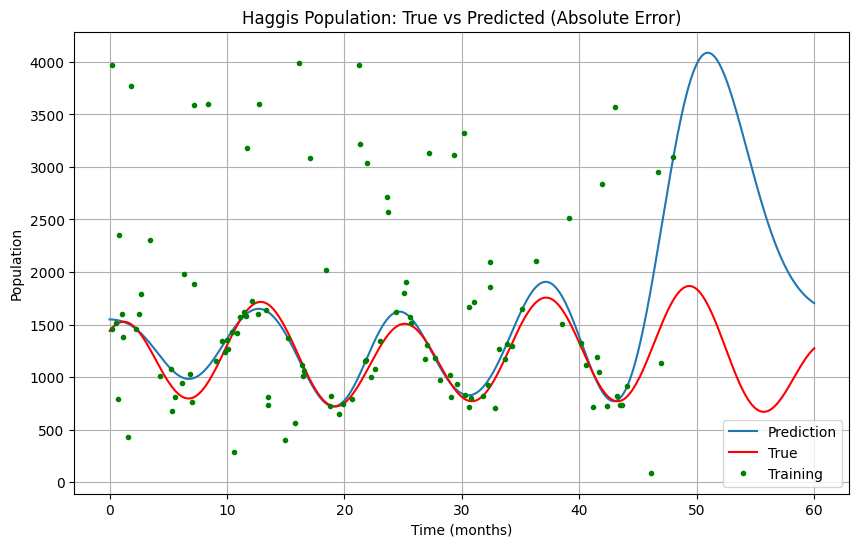

In [22]:
# Apply Gaussian basis function
Phi = gaussian(xtrain, num_basis=120, data_limits=[0, 60], width=3)

# Perform gradient descent using absolute error
w = grad_descent(grad_abs, Phi, ytrain_standardized, lam=0.01)

# Generate predictions for the entire dataset
truePhi = gaussian(xtrue, num_basis=120, data_limits=[0, 60], width=3)
predictions = (truePhi @ w) * data_std + data_mean

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(xtrue, predictions, label='Prediction')
plt.plot(xtrue, ytrue, '-r', label='True')
plt.plot(xtrain, ytrain, '.g', label='Training')
plt.legend()
plt.xlabel('Time (months)')
plt.ylabel('Population')
plt.title('Haggis Population: True vs Predicted (Absolute Error)')
plt.grid(True)
plt.show()

L1 loss is less sensitive to outliers than L2 loss. As the dataset contains outliers, L1 loss provides a more robust fit by reducing the impact of these extreme values.

### Enhancing the Model with Combined Gaussian and Sinusoidal Bases

To improve our model's forecasting ability, we've observed an annual oscillation in the data. Let's create a new basis function that combines both Gaussian and sinusoidal bases with appropriate wavelengths.

Our approach will be:

1. Use half of the `num_basis` for Gaussian bases
2. Use the other half for sinusoidal bases
3. All sinusoidal bases will have a 12-month period
4. The sinusoidal bases will have a range of offsets, uniformly distributed between 0 and 6 (not including 6)

This combined basis should capture both the overall trend (via Gaussian bases) and the annual cyclical patterns (via sinusoidal bases) in our data.

Let's implement this new combined basis function and see how it affects our model's performance.

In [23]:
def gaussian_and_sinusoidal(x, num_basis=4, data_limits=[-1., 1.], width = 10):
    """
    Return an N x D design matrix.
    Arguments:
     - x, input values (N dimensional vector)
     - num_basis, number of basis functions (specifies D)
     - data_limits, a list of two numbers, specifying the minimum and maximum of the data input domain.
     - width, the 'spread' of the Gaussians in the basis

    Half the bases are Gaussian, half are evenly spaced cosines of 12 month period (offset by between 0 to 6 months)
    """
    N = x.shape[0]
    D = num_basis

    # Number of Gaussian bases
    num_gaussian = D // 2

    # Number of sinusoidal bases
    num_sinusoidal = D - num_gaussian

    # Generate Gaussian bases
    gaussians = np.zeros((N, num_gaussian))
    for i in range(num_gaussian):
        mu = np.linspace(data_limits[0], data_limits[1], num_gaussian)[i]
        gaussians[:, i] = np.exp(-(x - mu) ** 2 / (2 * width ** 2))

    # Generate evenly spaced sinusoidal bases
    sinusoidals = np.zeros((N, num_sinusoidal))
    for i in range(num_sinusoidal):
        offset = i * (6 / num_sinusoidal)  # Evenly spaced offsets between 0 and 6
        sinusoidals[:, i] = np.cos(2 * np.pi * (x + offset) / 12)

    # Combine Gaussian and sinusoidal bases
    Phi = np.concatenate((gaussians, sinusoidals), axis=1)

    return Phi

Let's see how this has affected the result:

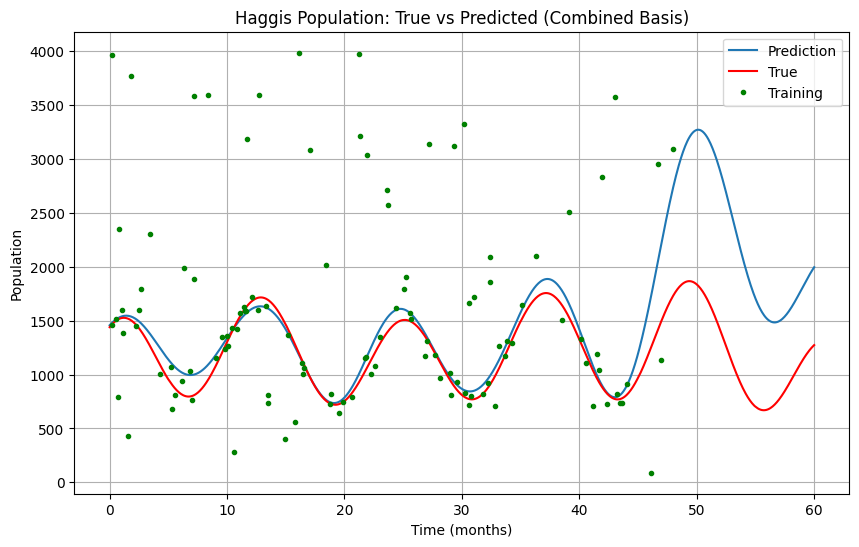

In [24]:
# Apply Gaussian and sinusoidal basis function
Phi = gaussian_and_sinusoidal(xtrain, num_basis=120, data_limits=[0, 60], width=3)

# Perform gradient descent using absolute error
w = grad_descent(grad_abs, Phi, ytrain_standardized, lam=0.01)

# Generate predictions for the entire dataset
truePhi = gaussian_and_sinusoidal(xtrue, num_basis=120, data_limits=[0, 60], width=3)
predictions = (truePhi @ w) * data_std + data_mean

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(xtrue, predictions, label='Prediction')
plt.plot(xtrue, ytrue, '-r', label='True')
plt.plot(xtrain, ytrain, '.g', label='Training')
plt.legend()
plt.xlabel('Time (months)')
plt.ylabel('Population')
plt.title('Haggis Population: True vs Predicted (Combined Basis)')
plt.grid(True)
plt.show()

### Parameter Selection and Model Evaluation

We now need to select the optimal parameters for our model. Our next steps are:

1. Implement a method to select good parameters, including:
   - An appropriate number of bases
   - An appropriate Gaussian basis width
   - An appropriate regularization term

2. Draw a graph to visualize the results

To accomplish this, we should consider:

- Using cross-validation to select parameters
- Deciding on an effective way to split our data into training and validation sets
  - We could use the approach from our earlier analysis
  - Remember that we have access to the true underlying function (`xtrue` and `ytrue`), so our comparison should be against this
  - Our goal is to perform well at forecasting, so our validation strategy should reflect this

Finally, we'll create a comprehensive plot showing:
a) The training points used
b) The true population (`xtrue`, `ytrue`)
c) Our model's predictions

This visualization will help us evaluate how well our model is performing, particularly in terms of its forecasting ability.

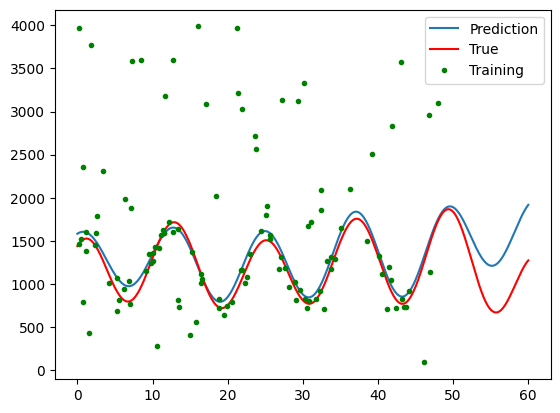

In [25]:
def cross_validation(Phi, y, lam_range=[0.001, 0.01, 0.1, 1, 10], num_basis_range=[5, 10, 20, 30]):
    """
    Perform cross-validation to find optimal hyperparameters (lambda and num_basis).
    Arguments:
     - Phi, design matrix
     - y, training outputs
     - lam_range, list of lambda values to try
     - num_basis_range, list of num_basis values to try
    Returns:
     - best_lambda, best_num_basis
    """
    best_lambda = None
    best_num_basis = None
    best_error = float('inf')

    # Split the data into training and validation sets using train_test_split
    Phi_train, Phi_val, y_train, y_val = train_test_split(Phi, y, test_size=0.2, random_state=42)

    for lam in lam_range:
        for num_basis in num_basis_range:
            w = grad_descent(grad_abs, Phi_train, y_train, lam)

            # Evaluate on the validation set
            val_predictions = Phi_val @ w
            val_error = np.mean(np.abs(val_predictions - y_val))

            if val_error < best_error:
                best_error = val_error
                best_lambda = lam
                best_num_basis = num_basis

    return best_lambda, best_num_basis

# Standardize the output variable ytrain using StandardScaler
scaler_y = StandardScaler()
ytrain_standardized = scaler_y.fit_transform(ytrain.reshape(-1, 1)).flatten()

Phi_train = gaussian_and_sinusoidal(xtrain, 120, [0, 60], 3)
best_lambda, best_num_basis = cross_validation(Phi_train, ytrain_standardized)

# Use the best_lambda and best_num_basis in your final model
final_Phi = gaussian_and_sinusoidal(xtrue, 120, [0, 60], 3)  # Use your test data
final_w = grad_descent(grad_abs, Phi_train, ytrain_standardized, best_lambda)

# Plot the final predictions
plt.plot(xtrue, (final_Phi @ final_w) * data_std + data_mean, label='Prediction')
plt.plot(xtrue, ytrue, '-r', label='True')
plt.plot(xtrain, ytrain, '.g', label='Training')
plt.legend()

The model effectively captures the cyclical pattern of the Haggis population, closely matching the true trend for most of the observed period. It successfully reproduces annual oscillations, demonstrating the effectiveness of the combined Gaussian and sinusoidal basis functions. However, the forecast for the last 12 months shows some divergence, overestimating peaks and underestimating troughs. The model appears robust against outliers in the training data but shows limitations in long-term prediction accuracy. Overall, the model performs well in capturing trends and seasonality but could benefit from refinement to improve future forecasting.